# Pendulum Dynamics


<a id='index-0'></a>

$\textbf{Pendulum Method}$

This implements the simple Pendulum Model

$\underline{\textbf{Setting the Environment}}$

In [9]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os

In [10]:
# Initial and end values
st = 0          # Start time (s)
et = 20.4       # End time (s)
ts = 0.1        # Time step (s)
g = 9.81        # Acceleration due to gravity (m/s^2)
L = 1           # Length of pendulum (m)
b = 0.5         # Damping factor (kg/s)
m = 1           # Mass of bob (kg)


In [ ]:
def calc_input():
    v = 1.0  # [m/s]
    yawrate = 0.1  # [rad/s]
    u = np.array([[v, yawrate]]).T
    return u

In [11]:
"""
 theta1 is angular displacement at current time instant
 theta2 is angular velocity at current time instant
 dtheta2_dt is angular acceleration at current time instant
 dtheta1_dt is rate of change of angular displacement at current time instant i.e. same as theta2 
"""

def sim_pen_eq(t,theta):
		dtheta2_dt = (-b/m)*theta[1] + (-g/L)*np.sin(theta[0])
		dtheta1_dt = theta[1]
		return [dtheta1_dt, dtheta2_dt]

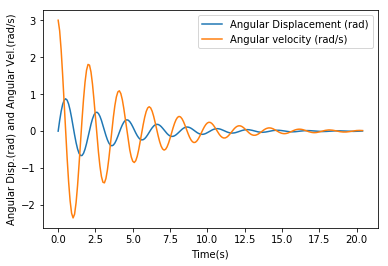

In [13]:
# main

theta1_ini = 0                 # Initial angular displacement (rad)
theta2_ini = 3                 # Initial angular velocity (rad/s)
theta_ini = [theta1_ini, theta2_ini]
t_span = [st,et+ts]
t = np.arange(st,et+ts,ts)
sim_points = len(t)
l = np.arange(0,sim_points,1)

theta12 = solve_ivp(sim_pen_eq, t_span, theta_ini, t_eval = t)
theta1 = theta12.y[0,:]
theta2 = theta12.y[1,:]
plt.plot(t,theta1,label='Angular Displacement (rad)')
plt.plot(t,theta2,label='Angular velocity (rad/s)')
plt.xlabel('Time(s)')
plt.ylabel('Angular Disp.(rad) and Angular Vel.(rad/s)')
plt.legend()
plt.show()

$\textit{By Dr Champ Mendis, AVS, 16-May-2019}$